In [19]:
import numpy as np
import datetime
import platform
import torch
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
from mlagents_envs.environment import UnityEnvironment, ActionTuple
from mlagents_envs.side_channel.engine_configuration_channel\
                             import EngineConfigurationChannel

                        

In [22]:
# # 유니티 환경 경로 설정
game = "Single_Agent_RL"
env_name = "../Single_Agent_RL_DQN/Single_Agent_RL_DQN"

# 유니티 환경 경로 설정 (file_name)
engine_configuration_channel = EngineConfigurationChannel()
env = UnityEnvironment(file_name=env_name,
                        side_channels=[engine_configuration_channel])
env.reset()


In [64]:

# 유니티 브레인 설정 
behavior_name = list(env.behavior_specs.keys())[0]
spec = env.behavior_specs[behavior_name]
engine_configuration_channel.set_configuration_parameters(time_scale=12.0)
dec, term = env.get_steps(behavior_name)


print(dec.obs[0].shape)
print(dec.obs[1].shape)
A = np.concatenate([dec.obs[0], dec.obs[2]],axis=-1)
print(A.shape)
print(dec.obs[2])
print(A[:,-5:])


(1, 42)
(1, 32, 32, 3)
(1, 47)
[[ 22.        -3.       -24.       -44.        61.652252]]
[[ 22.        -3.       -24.       -44.        61.652252]]


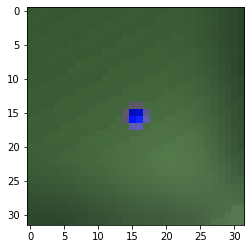

In [29]:
import matplotlib.pyplot as plt
env.reset()
env.step()
plt.imshow(dec.obs[1][0])


In [35]:
dec.obs[1].shape

(1, 32, 32, 3)

In [21]:
env.close()